In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/atakp/Documents/GitHub/amz_uk_price_prediction_dataset.csv")

In [ ]:
df.head(50)

# Part 1: Analyzing Best-Seller Trends Across Product Categories

# Objective: Understand the relationship between product categories and their best-seller status.

In [ ]:
#Crosstab Analysis:

#Create a crosstab between the product category and the isBestSeller status.

#Are there categories where being a best-seller is more prevalent?
#Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

In [3]:

crosstab = pd.crosstab(df['category'], df['isBestSeller'])

crosstab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [ ]:
crosstab_result['Proportion_BestSeller'] = crosstab_result[True] / crosstab_result.sum(axis=1)
crosstab_result['Proportion_BestSeller']
#The proportion of best-sellers for each category is calculated by dividing the count of best-sellers by the total count of products in each category.

In [4]:
crosstab = pd.crosstab(df['category'], df['isBestSeller'], margins=True)

In [5]:
crosstab['best_seller_proportion'] = crosstab[1] / crosstab['All']
crosstab['best_seller_proportion']

category
3D Printers                       0.004032
3D Printing & Scanning            0.000492
Abrasive & Finishing Products     0.020000
Action Cameras                    0.000589
Adapters                          0.011811
                                    ...   
Window Treatments                 0.020921
Women                             0.011985
Women's Sports & Outdoor Shoes    0.010209
eBook Readers & Accessories       0.000000
All                               0.003266
Name: best_seller_proportion, Length: 297, dtype: float64

In [12]:
crosstab_sorted = crosstab.sort_values(by='best_seller_proportion', ascending=False)
crosstab_sorted 

isBestSeller,False,True,All,best_seller_proportion
category,,,,
Grocery,9008,556,9564,0.058135
Smart Home Security & Lighting,98,6,104,0.057692
Health & Personal Care,9017,552,9569,0.057686
Mobile Phone Accessories,248,11,259,0.042471
Power & Hand Tools,8353,306,8659,0.035339
...,...,...,...,...
Snowboard Boots,1449,0,1449,0.000000
Internal TV Tuner & Video Capture Cards,253,0,253,0.000000
Boxes & Organisers,911,0,911,0.000000


In [6]:
sorted_categories = crosstab.sort_values(by='best_seller_proportion', ascending=False)
sorted_categories.head(50)

isBestSeller,False,True,All,best_seller_proportion
category,,,,
Grocery,9008,556,9564,0.058135
Smart Home Security & Lighting,98,6,104,0.057692
Health & Personal Care,9017,552,9569,0.057686
Mobile Phone Accessories,248,11,259,0.042471
Power & Hand Tools,8353,306,8659,0.035339
"Billiard, Snooker & Pool",241,8,249,0.032129
Pet Supplies,9152,285,9437,0.030200
Home Brewing & Wine Making,239,7,246,0.028455
Wind Instruments,243,7,250,0.028000


In [ ]:
#Statistical Tests:

#Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
#Compute Cramér's V to understand the strength of the association between best-seller status and category.
#Visualizations:
#Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [ ]:
#The chi-square test is a statistical test used to determine whether there is a significant association between two categorical variables.
from scipy.stats import chi2_contingency

# Chi-square test for 'category' and 'isBestSeller'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab)

chi2_statistic, chi2_p_value

In [13]:
from scipy.stats import chi2_contingency
chi2, p, _, _ = chi2_contingency(crosstab.iloc[:-1, :-1])

In [14]:
# Compute Cramér's V
n = crosstab.iloc[:-1, :-1].sum().sum()
phi = np.sqrt(chi2 / n)
cramer_v = phi / np.sqrt(min(crosstab.shape[0] - 1, crosstab.shape[1] - 1))

In [ ]:
# Cramer's V ranges from 0 to 1, where 0 indicates no association, and 1 represents a perfect association between the variables. 
#A higher value of Cramer's V indicates a stronger relationship between the categorical variables.
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab, method="cramer")

<Axes: xlabel='category'>

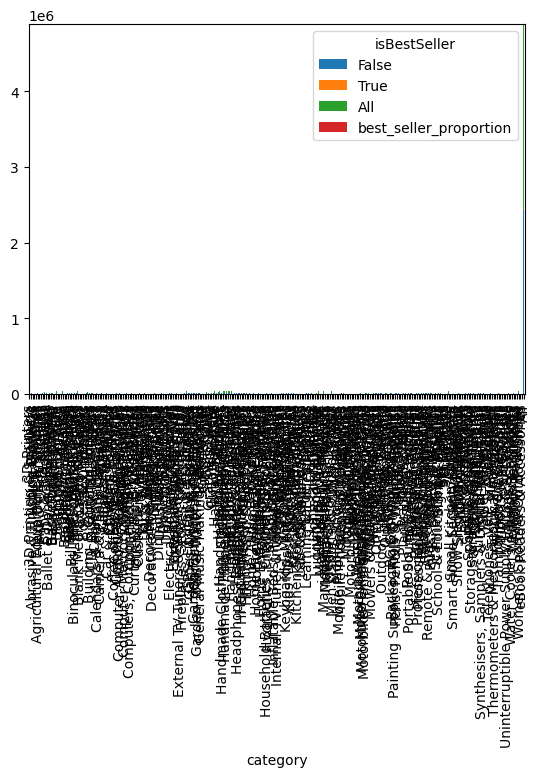

In [16]:
crosstab.plot(kind="bar", stacked=True)

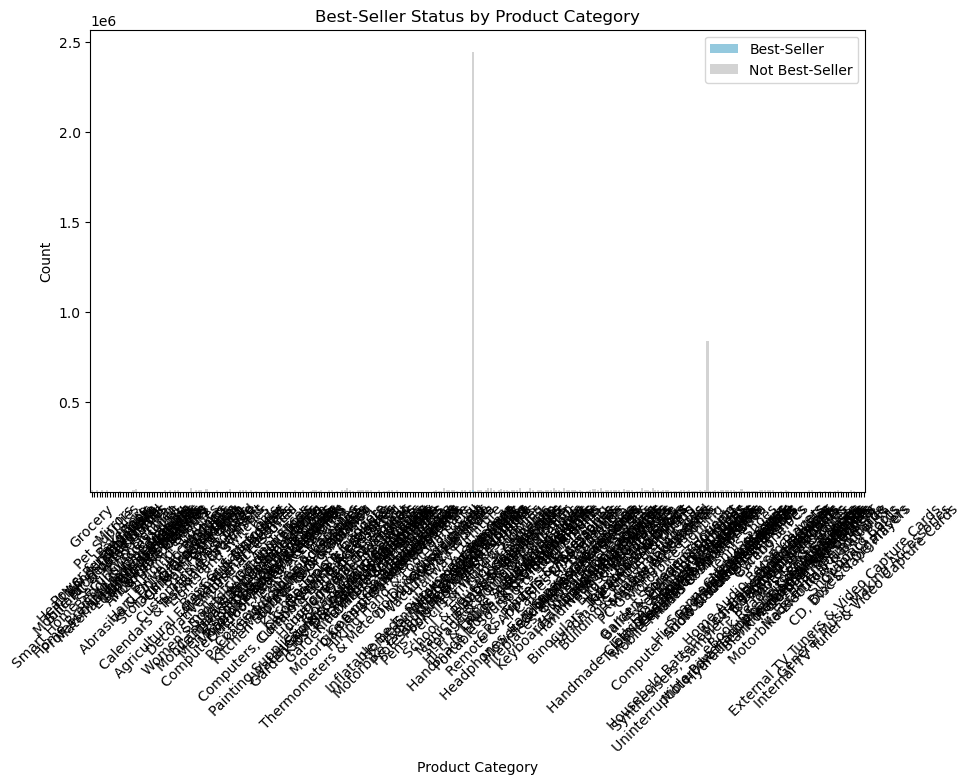

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x=crosstab_sorted.index, y=crosstab_sorted[1], color='skyblue', label='Best-Seller')
sns.barplot(x=crosstab_sorted.index, y=crosstab_sorted[0], bottom=crosstab_sorted[1], color='lightgray', label='Not Best-Seller')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Best-Seller Status by Product Category')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Part 2: Exploring Product Prices and Ratings Across Categories and Brands
# Objective: Investigate how different product categories influence product prices.

In [ ]:
#Preliminary Step: Remove outliers in product prices.

#For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

#Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

In [ ]:
#def tukeys_test_outliers(data):
    #Q1 = df.quantile(0.25)
    #Q3 = df.quantile(0.75)
    #IQR = Q3 - Q1
    
    # Define bounds for the outliers
    #lower_bound = Q1 - 1.5 * IQR
    #upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    #outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    #return outliers

In [17]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
    
    # Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
cleaned = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

In [ ]:
cleaned 

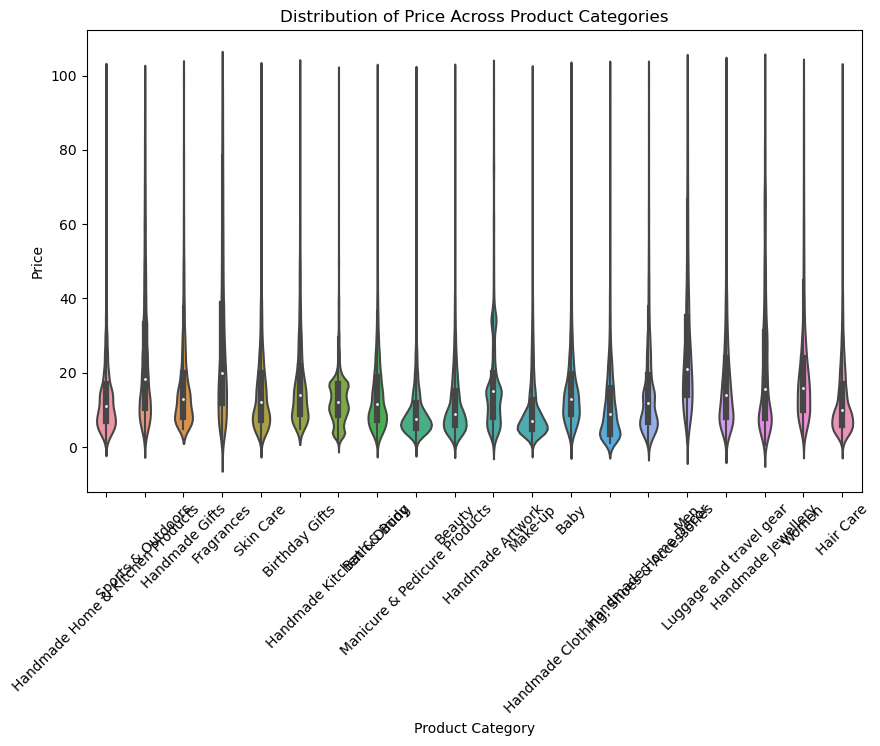

In [18]:
top_categories = cleaned['category'].value_counts().nlargest(20).index
plt.figure(figsize=(10, 6))
sns.violinplot(x='category', y='price', data=cleaned[cleaned['category'].isin(top_categories)])
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.title('Distribution of Price Across Product Categories')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Filter top 20 categories based on count
top_categories = cleaned['category'].value_counts().head(20).index
df_filtered = cleaned[cleaned['category'].isin(top_categories)]

In [ ]:
# Plotting a violin plot to visualize the distribution of 'price' for each 'category', using the "coolwarm" color palette
sns.violinplot(data=df_filtered, x='category', y='price', palette="coolwarm")
#Which product category tends to have the highest median price? Don't filter here by top categories
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Birthday Gifts'),
  Text(2, 0, 'Handmade Gifts'),
  Text(3, 0, 'Skin Care'),
  Text(4, 0, 'Bath & Body'),
  Text(5, 0, 'Hair Care'),
  Text(6, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(7, 0, 'Beauty'),
  Text(8, 0, 'Make-up'),
  Text(9, 0, 'Manicure & Pedicure Products')])

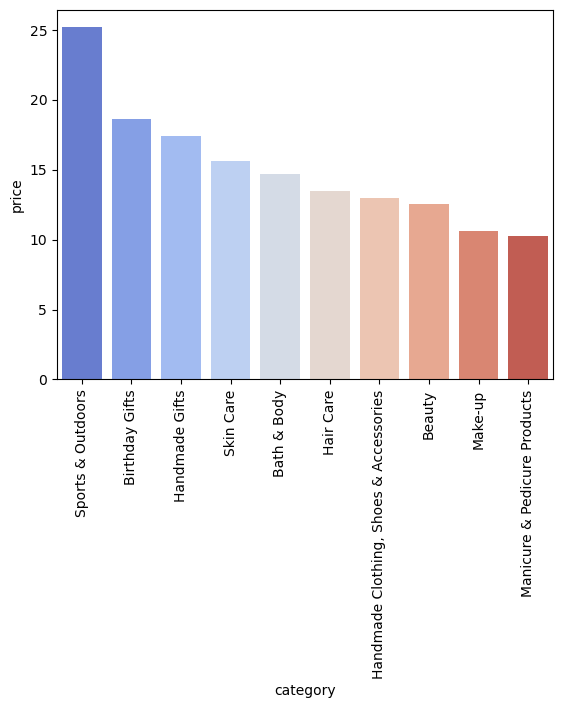

In [34]:
#Bar Charts:
#Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
#Which product category commands the highest average price? Don't filter here by top categories.
category_counts = cleaned["category"].value_counts()
# Select the top 10 categories based on count
top_10_categories = category_counts.nlargest(10).index
# Filter the DataFrame to include only products from the top 10 categories
df_top_10_categories = cleaned[cleaned["category"].isin(top_10_categories)]
# Calculate the average price for each category
average_prices = df_top_10_categories.groupby("category")["price"].mean().sort_values(ascending=False).reset_index()
sns.barplot(data=average_prices, x="category", y="price", palette="coolwarm")
plt.xticks(rotation = 90)

In [ ]:
sns.barplot(data=cleaned, x='category', y='price', palette="coolwarm")
plt.xticks(rotation = 90)

In [ ]:
#Box Plots:
#Visualize the distribution of product ratings based on their category using side-by-side box plots. 
#Filter out the top 10 categories based on count for better visualization.
#Which category tends to receive the highest median rating from customers? Don't filter here by top categories.


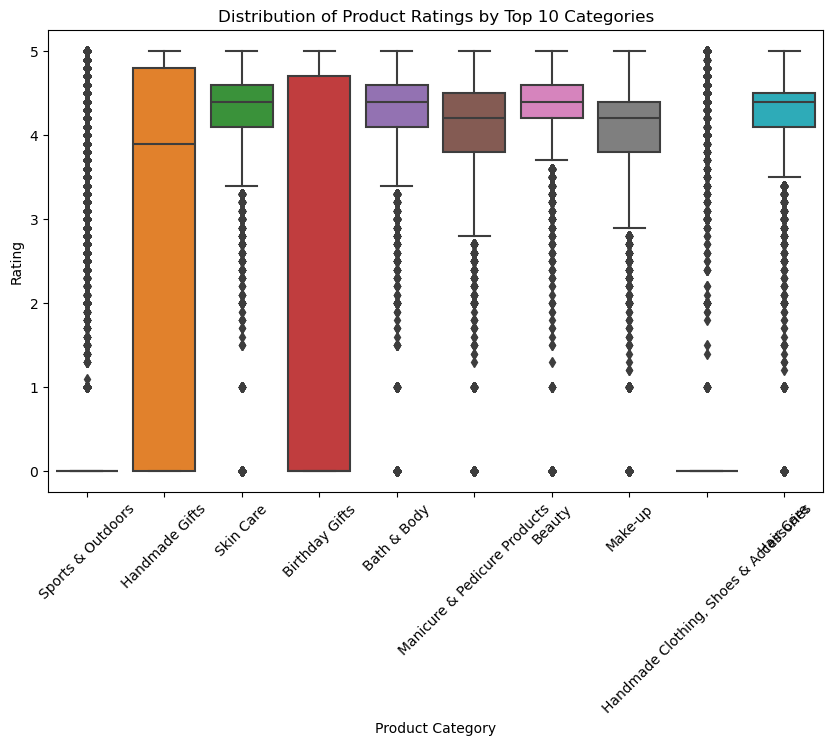

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='stars', data=cleaned[cleaned['category'].isin(top_10_categories)])
plt.xlabel('Product Category')
plt.ylabel('Rating')
plt.title('Distribution of Product Ratings by Top 10 Categories')
plt.xticks(rotation=45)
plt.show()

# Part 3: Investigating the Interplay Between Product Prices and Ratings
# Objective: Analyze how product ratings (stars) correlate with product prices.

In [ ]:
Correlation Coefficients:

Calculate the correlation coefficient between price and stars.
Is there a significant correlation between product price and its rating?
Visualizations:

Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
Use a correlation heatmap to visualize correlations between all numerical variables.
Examine if product prices typically follow a normal distribution using a QQ plot.

In [35]:
# Calculating the Pearson correlation coefficient 
correlation = cleaned['price'].corr(cleaned['stars'])
correlation

-0.07767299878178476

In [36]:
# Calculating the Spearman rank correlation 
correlation2 = cleaned['price'].corr(cleaned['stars'], method='spearman')
correlation

-0.07767299878178476

In [ ]:
#The Pearson correlation of (-0.1249) suggests a non linear relationship between the price and the rating. 
#As the rating increases, the price tend to decrease and vice versa.

#The Spearman correlation of (-0.1249) indicates a negative monotonic relationship between the two variables. 
#This means that as the rating increases, the price tend to decrease, but not necessarily at a constant rate.

<Axes: xlabel='price', ylabel='stars'>

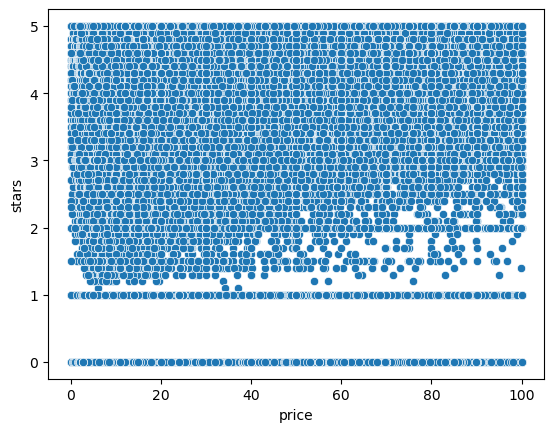

In [37]:
sns.scatterplot(data=cleaned, x='price', y='stars')

In [30]:
potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 20]
potential_categorical_from_numerical

""
0
1
2
3
4
...
2443646
2443647
2443648
2443649


In [31]:
# Adjusting the numerical dataframe by removing the moved columns
df_numerical = df.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)

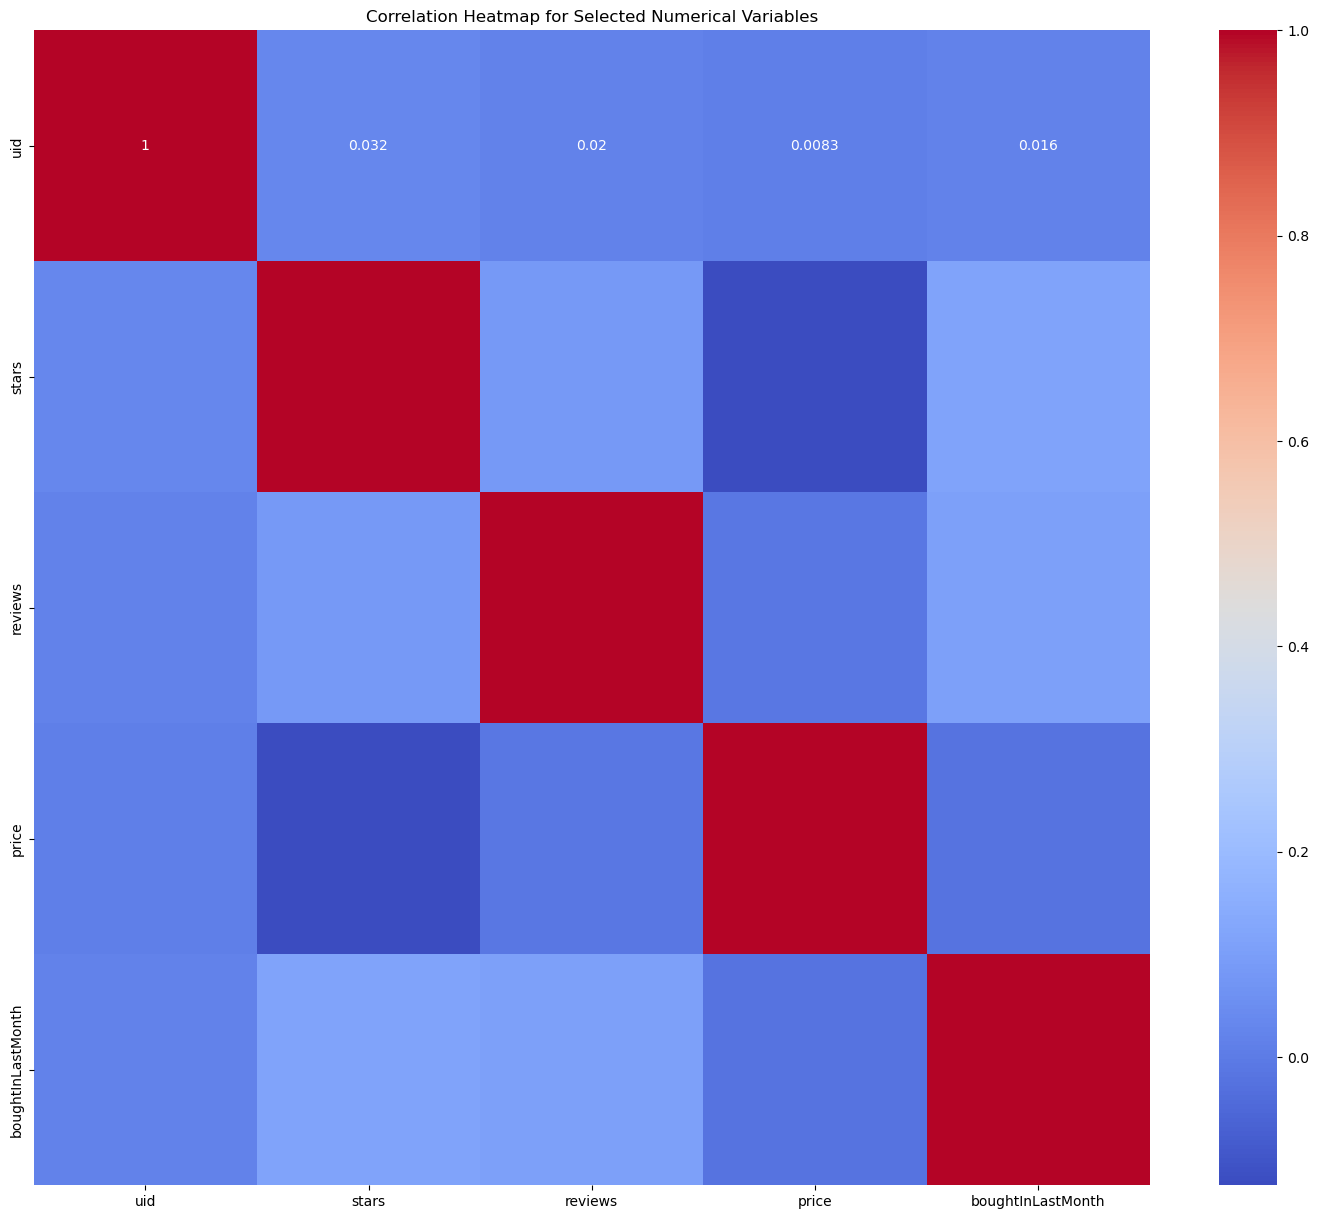

In [32]:
correlation_matrix =df_numerical.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

In [ ]:
#The Quantile-Quantile (QQ) plot is a graphical tool to help us assess if a dataset follows a particular theoretical distribution.

#Straight Line Alignment: If the data points (the blue dots) closely follow the red straight line (which represents the standard normal distribution), 
#it suggests that the data is approximately normally distributed.

#Deviations from the Line: Deviations of the data points from the red line, especially if systematic, indicate deviations from normality.

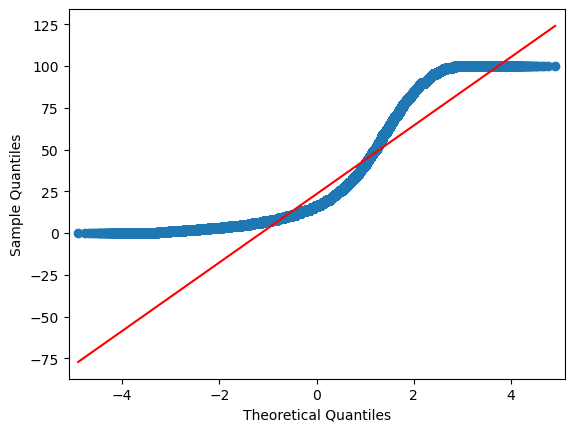

In [38]:
import statsmodels.api as sm

# Generating a Q-Q plot for 'price' to check if its distribution follows a normal distribution
sm.qqplot(cleaned['price'], line='s');

<Axes: >

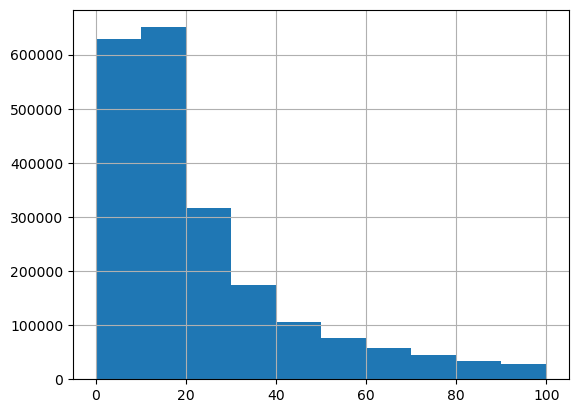

In [40]:
cleaned['price'].hist()